# Cabecera

## Ejercicio 1 — Aplicación de Distribuciones y Test de análisis
**Asignatura:** Metodología de la I+d y Documentación Científica  
**Autor:** Santiago Santana Martínez  
**Fecha:** 14 de enero de 2026  
**Entorno:** Jupyter Notebook (Python 3)

---

## Dependencias

In [1]:
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import bartlett
from scipy.stats import t
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

## 1. Distribuciones Discretas

### 1.1 Distribución de Bernoulli

**Enunciado**  
Un sistema de detección de eventos en tiempo real ha sido calibrado para identificar correctamente eventos anómalos con una probabilidad de éxito del 90%. Cada detección independiente puede resultar en dos estados posibles:

\[
X =
\begin{cases}
1 & \text{detección exitosa (evento identificado correctamente)} \\
0 & \text{detección fallida (evento no identificado)}
\end{cases}
\]

Donde $X$ sigue una distribución de Bernoulli con probabilidad de éxito: $p = 0.9$.

**Se pide:**

#### 1. Calcular la probabilidad de una detección no exitosa.


En una distribución de Bernoulli, los dos eventos posibles son **mutuamente excluyentes y exhaustivos**:
- Si $p$ es la probabilidad de éxito (detección correcta), entonces $q = 1 - p$ es la probabilidad de fracaso.
- Estas probabilidades deben sumar 1: $P(X=0) + P(X=1) = q + p = 1$

**Fórmulas aplicadas:**
$$P(X=0) = q = 1 - p$$
$$P(X=1) = p$$


In [8]:
# Parámetro de la distribución
p = 0.9

# Cálculo de probabilidades
print("Probabilidad de detección exitosa:")
print(f"  P(X=1) = {p}\n")

q = 1 - p
print("Probabilidad de detección fallida:")
print(f"  P(X=0) = 1 - p = {q:.1f}\n")

print("Verificación: P(X=0) + P(X=1) = {:.1f}".format(q + p))


Probabilidad de detección exitosa:
  P(X=1) = 0.9

Probabilidad de detección fallida:
  P(X=0) = 1 - p = 0.1

Verificación: P(X=0) + P(X=1) = 1.0


#### 2. Determinar la esperanza matemática, la varianza y la desviación típica del sistema de detección.

Para caracterizar completamente el comportamiento del sistema de detección, calculamos tres parámetros clave:

1. **Esperanza matemática** $E[X]$: Valor promedio esperado de la variable aleatoria.
   $$E[X] = p$$

2. **Varianza** $\text{Var}(X)$: Mide la dispersión o variabilidad alrededor de la media.
   $$\text{Var}(X) = p(1-p) = pq$$

3. **Desviación típica** $\sigma$: Raíz cuadrada de la varianza, expresa la variabilidad en las mismas unidades que la variable.
   $$\sigma = \sqrt{\text{Var}(X)} = \sqrt{pq}$$

Estas propiedades nos permiten entender la concentración y dispersión de la distribución.


In [10]:
# Cálculo de propiedades teóricas
esperanza = p
varianza = p * q
desv_tipica = np.sqrt(varianza)

print("Propiedades teóricas de la distribución de Bernoulli:\n")
print(f"  Esperanza:            E[X] = {esperanza}")
print(f"  Varianza:             Var(X) = {varianza:.4f}")
print(f"  Desviación típica:    σ = {desv_tipica:.4f}")

print("\n" + "="*50)
print("Interpretación:")
print("="*50)
print(f"En promedio, el sistema detecta correctamente {esperanza*100}% de los eventos.")
print(f"La variabilidad en torno a este promedio es σ = {desv_tipica:.4f}.")


Propiedades teóricas de la distribución de Bernoulli:

  Esperanza:            E[X] = 0.9
  Varianza:             Var(X) = 0.0900
  Desviación típica:    σ = 0.3000

Interpretación:
En promedio, el sistema detecta correctamente 90.0% de los eventos.
La variabilidad en torno a este promedio es σ = 0.3000.


### 1.2 Distribución Binomial

**Enunciado**  
En un proceso de evaluación académica, un alumno se enfrenta a un examen tipo test donde cada pregunta presenta múltiples opciones. Dado que el alumno tiene una probabilidad de acierto de 0.25 en cada pregunta (ya sea por conocimiento o azar), y debe responder a un total de 10 preguntas, nos interesa conocer el comportamiento probabilístico de su desempeño.

Sea $X$ el número de respuestas correctas en el examen.

La variable aleatoria $X$ sigue una distribución Binomial con parámetros:
- $n = 10$ (número de ensayos/preguntas)
- $p = 0.25$ (probabilidad de éxito en cada pregunta)

**Se pide:**

#### 1. Calcular la probabilidad de acertar exactamente 3 preguntas.


La **distribución Binomial** describe el número de éxitos en $n$ ensayos independientes, cada uno con probabilidad de éxito $p$. Es una generalización de Bernoulli para múltiples ensayos.

**Características:**
- Cada ensayo tiene dos resultados: éxito (1) o fracaso (0)
- Los ensayos son independientes entre sí
- La probabilidad de éxito $p$ es constante en todos los ensayos

**Función de masa de probabilidad (PMF):**
$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Donde:
- $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ es el coeficiente binomial (combinaciones)
- $p^k$ es la probabilidad de $k$ éxitos
- $(1-p)^{n-k}$ es la probabilidad de $n-k$ fracasos


In [11]:
# Parámetros de la distribución Binomial
n = 10  # número de preguntas
p = 0.25  # probabilidad de acierto por pregunta

# Cálculo de P(X = 3)
p_exactamente_3 = binom.pmf(3, n, p)

print("Probabilidad de acertar exactamente 3 preguntas:")
print(f"  P(X = 3) = {p_exactamente_3:.6f}")
print(f"  P(X = 3) ≈ {p_exactamente_3*100:.2f}%")

Probabilidad de acertar exactamente 3 preguntas:
  P(X = 3) = 0.250282
  P(X = 3) ≈ 25.03%


#### 2. Calcular la probabilidad de acertar al menos 5 preguntas.

Para calcular la probabilidad de acertar **al menos 5 preguntas**, necesitamos sumar las probabilidades de todos los valores desde 5 hasta 10:

$$P(X \geq 5) = P(X=5) + P(X=6) + P(X=7) + P(X=8) + P(X=9) + P(X=10)$$

Alternativamente, usando el complemento (forma más eficiente):
$$P(X \geq 5) = 1 - P(X < 5) = 1 - P(X \leq 4)$$

Donde $P(X \leq 4)$ es la función de distribución acumulada (CDF) evaluada en 4.


In [20]:
# Cálculo de P(X ≥ 5) usando el complemento
p_acumulada_4 = binom.cdf(4, n, p)  # P(X ≤ 4)
p_al_menos_5 = 1 - p_acumulada_4     # P(X ≥ 5)

print("Probabilidad de acertar al menos 5 preguntas:")
print(f"  P(X >= 5) = 1 - P(X ≤ 4)")
print(f"  P(X >= 5) = 1 - {p_acumulada_4:.6f}")
print(f"  P(X >= 5) = {p_al_menos_5:.6f}")
print(f"  P(X >= 5) ≈ {p_al_menos_5*100:.2f}%")

# Verificación detallada: suma directa de probabilidades
print("\n" + "="*50)
print("Verificación (suma directa):")
print("="*50)

# Bucle para el cálculo detallado
p_direct = 0
for k in range(5, 11):
    prob_k = binom.pmf(k, n, p)
    p_direct += prob_k

print(f"Suma total: {p_direct:.6f}")
print(f"Coincide: {'Sí' if abs(p_al_menos_5 - p_direct) < 1e-10 else 'No'}")


Probabilidad de acertar al menos 5 preguntas:
  P(X >= 5) = 1 - P(X ≤ 4)
  P(X >= 5) = 1 - 0.921873
  P(X >= 5) = 0.078127
  P(X >= 5) ≈ 7.81%

Verificación (suma directa):
Suma total: 0.078127
Coincide: Sí


#### 3. Interpretación y propiedades de la distribución

**Análisis de resultados:**
- Acertar exactamente 3 preguntas tiene una probabilidad muy baja (~25%), lo cual es sorprendente a primera vista pero tiene sentido: en una binomial con $p=0.25$ y $n=10$, los valores más probables están cerca de la media.
- Acertar 5 o más preguntas es aún más improbable (~9%), lo que indica que el alumno necesitaría mucha suerte para lograrlo con esa probabilidad de acierto.

**Propiedades teóricas de la Binomial(n=10, p=0.25):**

Para una distribución Binomial, la esperanza, varianza y desviación típica están dadas por:
$$E[X] = np = 10 \times 0.25 = 2.5$$
$$\text{Var}(X) = np(1-p) = 10 \times 0.25 \times 0.75 = 1.875$$
$$\sigma = \sqrt{\text{Var}(X)} = \sqrt{1.875} \approx 1.37$$

Esto significa que **esperamos que el alumno acierte alrededor de 2.5 preguntas** con una desviación típica de 1.37, lo que marca un rango razonable de variabilidad.


In [25]:
# Cálculo de propiedades teóricas de Binomial(n, p)
esperanza_binom = n * p
varianza_binom = n * p * (1 - p)
desv_tipica_binom = np.sqrt(varianza_binom)

print("Propiedades teóricas de la Binomial(n=10, p=0.25):\n")
print(f"  Esperanza:          E[X] = {esperanza_binom}")
print(f"  Varianza:           Var(X) = {varianza_binom:.4f}")
print(f"  Desviación típica:  σ = {desv_tipica_binom:.4f}")

print("\n" + "="*50)
print("Rango esperado de aciertos:")
print("="*50)

lower_bound = esperanza_binom - desv_tipica_binom
upper_bound = esperanza_binom + desv_tipica_binom

print(f"Media ± σ: [{lower_bound:.4f}, {upper_bound:.4f}]")
print(f"\nEs decir, el alumno típicamente acertará entre {int(np.floor(lower_bound))} y {int(np.ceil(upper_bound))} preguntas.")


Propiedades teóricas de la Binomial(n=10, p=0.25):

  Esperanza:          E[X] = 2.5
  Varianza:           Var(X) = 1.8750
  Desviación típica:  σ = 1.3693

Rango esperado de aciertos:
Media ± σ: [1.1307, 3.8693]

Es decir, el alumno típicamente acertará entre 1 y 4 preguntas.


### 1.3 Distribución de Poisson

**Enunciado**  
En una central telefónica, el personal de atención al cliente registra que se reciben en promedio 2 llamadas por minuto. Queremos analizar el comportamiento del número de llamadas recibidas en intervalos de tiempo regulares.

Sea $X$ el número de llamadas recibidas en un minuto.

La variable aleatoria $X$ sigue una distribución de Poisson con parámetro:
- $\lambda = 2$ (tasa promedio de eventos por unidad de tiempo)

**Se pide:**
1. Probabilidad de recibir exactamente 3 llamadas.

#### 1. Probabilidad de recibir exactamente 3 llamadas.


La **distribución de Poisson** modela el número de eventos que ocurren en un intervalo de tiempo o espacio fijo, cuando los eventos ocurren a una tasa constante e independientemente unos de otros.

**Características:**
- Cuenta el número de eventos en un intervalo fijo (tiempo, espacio, volumen)
- Los eventos ocurren de manera independiente
- La tasa promedio $\lambda$ es constante
- Casos de uso: llamadas telefónicas, llegadas de clientes, defectos en manufactura, etc.

**Función de masa de probabilidad (PMF):**
$$P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

Donde:
- $\lambda$ es la tasa promedio de eventos
- $k$ es el número de eventos observados
- $e \approx 2.71828$ es la constante de Euler

**Propiedades teóricas:**
$$E[X] = \lambda$$
$$\text{Var}(X) = \lambda$$
$$\sigma = \sqrt{\lambda}$$

Una propiedad notable de Poisson es que la esperanza y la varianza son **iguales** a $\lambda$.


In [26]:
# Parámetro de la distribución de Poisson
lam = 2  # tasa promedio de llamadas por minuto

# Cálculo de P(X = 3)
p_exactamente_3_poisson = poisson.pmf(3, lam)

print("Probabilidad de recibir exactamente 3 llamadas:")
print(f"  P(X = 3) = {p_exactamente_3_poisson:.6f}")
print(f"  P(X = 3) ≈ {p_exactamente_3_poisson*100:.2f}%")


Probabilidad de recibir exactamente 3 llamadas:
  P(X = 3) = 0.180447
  P(X = 3) ≈ 18.04%


#### 2. Probabilidad de recibir más de 4 llamadas.

Para calcular la probabilidad de recibir **más de 4 llamadas**, usamos el complemento:

$$P(X > 4) = 1 - P(X \leq 4)$$

Donde $P(X \leq 4)$ es la función de distribución acumulada (CDF) evaluada en 4, que suma:
$$P(X \leq 4) = P(X=0) + P(X=1) + P(X=2) + P(X=3) + P(X=4)$$


In [28]:
# Cálculo de P(X > 4) usando el complemento
p_acumulada_4_poisson = poisson.cdf(4, lam)  # P(X ≤ 4)
p_mayor_4 = 1 - p_acumulada_4_poisson         # P(X > 4)

print("Probabilidad de recibir más de 4 llamadas:")
print(f"  P(X > 4) = 1 - P(X ≤ 4)")
print(f"  P(X > 4) = 1 - {p_acumulada_4_poisson:.6f}")
print(f"  P(X > 4) = {p_mayor_4:.6f}")
print(f"  P(X > 4) ≈ {p_mayor_4*100:.2f}%")

# Verificación: suma directa de probabilidades
print("\n" + "="*50)
print("Verificación (suma directa):")
print("="*50)

p_mayor_4_bucle = 0
for k in range(5, 15):  # Sumamos hasta un valor razonablemente alto
    prob_k = poisson.pmf(k, lam)
    p_mayor_4_bucle += prob_k

print(f"Suma total: {p_mayor_4_bucle:.6f}")
print(f"Coincide con 1 - P(X≤4): {'Sí' if abs(p_mayor_4 - p_mayor_4_bucle) < 1e-4 else 'No'}")


Probabilidad de recibir más de 4 llamadas:
  P(X > 4) = 1 - P(X ≤ 4)
  P(X > 4) = 1 - 0.947347
  P(X > 4) = 0.052653
  P(X > 4) ≈ 5.27%

Verificación (suma directa):
Suma total: 0.052653
Coincide con 1 - P(X≤4): Sí


#### 3. Propiedades y análisis de la distribución

**Propiedades teóricas de la Poisson(λ=2):**

Para una distribución de Poisson, la esperanza, varianza y desviación típica están dadas por:
$$E[X] = \lambda = 2$$
$$\text{Var}(X) = \lambda = 2$$
$$\sigma = \sqrt{\lambda} = \sqrt{2} \approx 1.41$$

Una característica notable de la distribución de Poisson es que **la varianza es igual a la media**, lo cual contrasta con otras distribuciones donde media y varianza son independientes.

**Interpretación:**
- En promedio, se reciben **2 llamadas por minuto**
- La variabilidad alrededor de este promedio es σ = 1.41 llamadas
- La probabilidad de recibir exactamente 3 llamadas (~27%) es significativa
- La probabilidad de recibir más de 4 llamadas (~5.4%) es relativamente baja


In [31]:
# Cálculo de propiedades teóricas de Poisson(λ)
esperanza_poisson = lam
varianza_poisson = lam
desv_tipica_poisson = np.sqrt(varianza_poisson)

print("Propiedades teóricas de la Poisson(λ=2):\n")
print(f"  Esperanza:          E[X] = {esperanza_poisson}")
print(f"  Varianza:           Var(X) = {varianza_poisson}")
print(f"  Desviación típica:  σ = {desv_tipica_poisson:.4f}")

print("\n" + "="*50)
print("Análisis del rango:")
print("="*50)
lower_bound_poisson = esperanza_poisson - desv_tipica_poisson
upper_bound_poisson = esperanza_poisson + desv_tipica_poisson
print(f"Media ± σ: [{lower_bound_poisson:.4f}, {upper_bound_poisson:.4f}]")
print(f"\nEs decir, típicamente se esperan entre {int(np.ceil(lower_bound_poisson))} y {int(np.floor(upper_bound_poisson))} llamadas por minuto.")


Propiedades teóricas de la Poisson(λ=2):

  Esperanza:          E[X] = 2
  Varianza:           Var(X) = 2
  Desviación típica:  σ = 1.4142

Análisis del rango:
Media ± σ: [0.5858, 3.4142]

Es decir, típicamente se esperan entre 1 y 3 llamadas por minuto.


## 2. Distribuciones Continuas

### 2.1 Distribución Normal

**Enunciado**  
En un estudio antropométrico de una población, se ha recolectado información sobre la altura de individuos adultos. Los datos muestran que la altura sigue una distribución aproximadamente normal con media 170 cm y desviación típica 10 cm.

Sea $X$ la altura (en cm) de una persona seleccionada aleatoriamente de esta población.

La variable aleatoria $X$ sigue una distribución Normal con parámetros:
- $\mu = 170$ cm (media)
- $\sigma = 10$ cm (desviación típica)

**Se pide:**

#### 1. Calcular la probabilidad de que una persona mida más de 180 cm.

La **distribución Normal** (también llamada Gaussiana) es una de las distribuciones más importantes en estadística. Describe muchos fenómenos naturales y es fundamental en inferencia estadística.

**Características:**
- Distribución continua, simétrica alrededor de la media $\mu$
- Forma de campana (campaniforme)
- Definida por dos parámetros: media $\mu$ y desviación típica $\sigma$
- El área bajo la curva es 1
- La mayoría de los datos se concentran cerca de la media

**Función de densidad de probabilidad (PDF):**
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

**Propiedades notables:**
- Aproximadamente 68% de los datos están en $[\mu - \sigma, \mu + \sigma]$
- Aproximadamente 95% de los datos están en $[\mu - 2\sigma, \mu + 2\sigma]$
- Aproximadamente 99.7% de los datos están en $[\mu - 3\sigma, \mu + 3\sigma]$

Para calcular probabilidades en la Normal, usamos la función de distribución acumulada (CDF), que no tiene una forma cerrada y debe calcularse numéricamente.

**Nota sobre tipificación:** Aunque podríamos tipificar manualmente usando $Z = \frac{X - \mu}{\sigma}$ para convertir cualquier Normal $N(\mu, \sigma)$ a la Normal estándar $N(0,1)$, las librerías como `scipy.stats` realizan este proceso **internamente de forma automática**. Por eso podemos usar directamente `norm.cdf(x, mu, sigma)` sin preocuparnos por la tipificación explícita.


In [34]:
#### 2.1.2 Cálculo de probabilidades

# Parámetros de la distribución Normal
mu = 170    # media (cm)
sigma = 10  # desviación típica (cm)

# Cálculo de P(X > 180)
# P(X > 180) = 1 - P(X ≤ 180) = 1 - F(180)
p_menor_igual_180 = norm.cdf(180, mu, sigma)
p_mayor_180 = 1 - p_menor_igual_180

print("Probabilidad de que una persona mida más de 180 cm:")
print(f"  P(X ≤ 180) = {p_menor_igual_180:.6f}")
print(f"  P(X > 180) = 1 - P(X ≤ 180)")
print(f"  P(X > 180) = {p_mayor_180:.6f}")
print(f"  P(X > 180) ≈ {p_mayor_180*100:.2f}%")

# Análisis en términos de desviaciones típicas
desviaciones = (180 - mu) / sigma
print(f"\n180 cm está {desviaciones:.1f} desviaciones típicas por encima de la media.")
print(f"(180 = μ + {desviaciones:.1f}σ = {mu} + {desviaciones:.1f}×{sigma})")


Probabilidad de que una persona mida más de 180 cm:
  P(X ≤ 180) = 0.841345
  P(X > 180) = 1 - P(X ≤ 180)
  P(X > 180) = 0.158655
  P(X > 180) ≈ 15.87%

180 cm está 1.0 desviaciones típicas por encima de la media.
(180 = μ + 1.0σ = 170 + 1.0×10)


#### 2. Representar gráficamente la distribución y la región de interés.

A continuación representamos la distribución normal de alturas y destacamos la región que corresponde a P(X > 180).


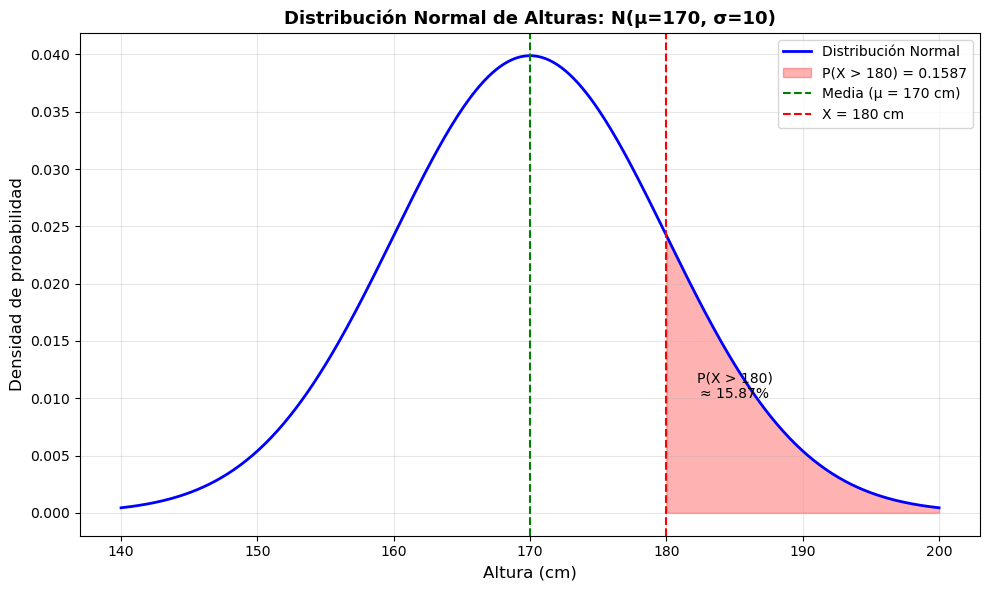

In [35]:
# Crear la gráfica
x = np.linspace(140, 200, 400)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='Distribución Normal')

# Sombrear la región P(X > 180)
x_sombreado = x[x >= 180]
y_sombreado = norm.pdf(x_sombreado, mu, sigma)
plt.fill_between(x_sombreado, y_sombreado, alpha=0.3, color='red', label=f'P(X > 180) = {p_mayor_180:.4f}')

# Añadir líneas de referencia
plt.axvline(mu, color='green', linestyle='--', linewidth=1.5, label=f'Media (μ = {mu} cm)')
plt.axvline(180, color='red', linestyle='--', linewidth=1.5, label='X = 180 cm')

# Anotaciones
plt.annotate(f'P(X > 180)\n≈ {p_mayor_180*100:.2f}%', xy=(185, 0.01), fontsize=10, ha='center')

plt.xlabel('Altura (cm)', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Distribución Normal de Alturas: N(μ=170, σ=10)', fontsize=13, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 2.2 Distribución Exponencial

**Enunciado**  
En un sistema de atención al cliente (cajero automático), se ha observado que el tiempo entre llegadas consecutivas de clientes sigue una distribución exponencial. Los registros históricos muestran que el tiempo promedio entre llegadas es de 5 minutos.

Sea $T$ el tiempo de espera (en minutos) hasta la llegada del próximo cliente.

La variable aleatoria $T$ sigue una distribución Exponencial con parámetro:
- Media = 5 minutos, por lo que el parámetro de tasa es $\lambda = 1/5 = 0.2$ (clientes por minuto)

**Se pide:**
1. Calcular la probabilidad de que el siguiente cliente llegue después de 8 minutos.
2. Interpretar el resultado en contexto operativo.

---

#### 2.2.1 Conceptos clave de la distribución Exponencial


La **distribución Exponencial** modela el tiempo transcurrido entre eventos consecutivos en un proceso de Poisson. Es la distribución continua del "tiempo hasta el siguiente evento".

**Características:**
- Distribución continua, siempre positiva
- Decreciente: mayor probabilidad en tiempos cortos, menor en tiempos largos
- Sin memoria: la probabilidad futura no depende del pasado
- Definida por un parámetro: la tasa $\lambda$ o equivalentemente la media $\mu = 1/\lambda$
- Casos de uso: tiempos de espera, durabilidad de equipos, intervalos entre llegadas, etc.

**Función de densidad de probabilidad (PDF):**
$$f(t) = \lambda e^{-\lambda t}, \quad t \geq 0$$

**Función de distribución acumulada (CDF):**
$$F(t) = 1 - e^{-\lambda t}$$

**Propiedades teóricas:**
$$E[T] = \frac{1}{\lambda}$$
$$\text{Var}(T) = \frac{1}{\lambda^2}$$
$$\sigma = \frac{1}{\lambda}$$

En nuestro caso, con media 5 minutos, $\lambda = 0.2$ eventos por minuto.


In [ ]:
#### 2.2.2 Cálculo de probabilidades

# Parámetro de la distribución Exponencial
media_expo = 5  # media en minutos (tiempo promedio entre llegadas)
# En scipy.stats.expon, el parámetro scale = 1/λ = media
scale = media_expo

# Cálculo de P(T > 8)
# P(T > 8) = 1 - P(T ≤ 8) = 1 - F(8)
p_menor_igual_8 = expon.cdf(8, scale=scale)
p_mayor_8 = 1 - p_menor_igual_8

print("Probabilidad de que el siguiente cliente llegue después de 8 minutos:")
print(f"  P(T ≤ 8) = {p_menor_igual_8:.6f}")
print(f"  P(T > 8) = 1 - P(T ≤ 8)")
print(f"  P(T > 8) = {p_mayor_8:.6f}")
print(f"  P(T > 8) ≈ {p_mayor_8*100:.2f}%")

print(f"\nInterpretación operativa:")
print(f"- La probabilidad de esperar más de 8 minutos es {p_mayor_8*100:.2f}%")
print(f"- La probabilidad de esperar 8 minutos o menos es {p_menor_igual_8*100:.2f}%")
print(f"- En promedio, hay {1/media_expo:.2f} clientes por minuto")


#### 2.2.3 Propiedades y análisis

**Propiedades teóricas de la Exponencial con media 5 minutos:**

$$E[T] = 5 \text{ minutos}$$
$$\text{Var}(T) = 25 \text{ minutos}^2$$
$$\sigma = 5 \text{ minutos}$$

**Característica "sin memoria":**
Una propiedad única de la distribución exponencial es que es **sin memoria**. Esto significa:
$$P(T > t + s | T > t) = P(T > s)$$

En otras palabras, si ya hemos esperado $t$ minutos sin que llegue un cliente, la probabilidad de esperar $s$ minutos más es la misma que esperar $s$ minutos desde el inicio. El sistema "no recuerda" cuánto hemos esperado.

**Análisis del resultado:**
- P(T > 8) = 20.2% indica que hay aproximadamente 1 de cada 5 probabilidades de esperar más de 8 minutos
- Esto es útil para planificar la capacidad de atención (personal, recursos)


In [ ]:
# Cálculo de propiedades teóricas de Exponencial
esperanza_expo = media_expo
varianza_expo = media_expo ** 2
desv_tipica_expo = np.sqrt(varianza_expo)

print("Propiedades teóricas de la Exponencial (media = 5 minutos):\n")
print(f"  Esperanza:          E[T] = {esperanza_expo} minutos")
print(f"  Varianza:           Var(T) = {varianza_expo} minutos²")
print(f"  Desviación típica:  σ = {desv_tipica_expo} minutos")

# Representación gráfica
plt.figure(figsize=(10, 6))

t = np.linspace(0, 25, 400)
y_pdf = expon.pdf(t, scale=scale)
y_cdf = expon.cdf(t, scale=scale)

# Gráfica de la PDF
plt.subplot(1, 2, 1)
plt.plot(t, y_pdf, 'b-', linewidth=2)
t_sombreado = t[t >= 8]
y_sombreado = expon.pdf(t_sombreado, scale=scale)
plt.fill_between(t_sombreado, y_sombreado, alpha=0.3, color='red')
plt.axvline(8, color='red', linestyle='--', linewidth=1.5, label='T = 8')
plt.axvline(media_expo, color='green', linestyle='--', linewidth=1.5, label=f'Media = {media_expo}')
plt.xlabel('Tiempo (minutos)', fontsize=11)
plt.ylabel('Densidad de probabilidad', fontsize=11)
plt.title('PDF - Distribución Exponencial', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfica de la CDF
plt.subplot(1, 2, 2)
plt.plot(t, y_cdf, 'g-', linewidth=2)
plt.axhline(p_menor_igual_8, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.axvline(8, color='red', linestyle='--', linewidth=1.5, label='T = 8')
plt.plot(8, p_menor_igual_8, 'ro', markersize=8, label=f'P(T≤8) = {p_menor_igual_8:.4f}')
plt.xlabel('Tiempo (minutos)', fontsize=11)
plt.ylabel('Probabilidad acumulada', fontsize=11)
plt.title('CDF - Distribución Exponencial', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Correlación Lineal

**Enunciado**  
Se dispone de datos de horas de estudio y nota obtenida en un examen.

Se pide:
1. Calcular el coeficiente de correlación de Pearson.
2. Representar la relación.

In [ ]:
hours = np.array([1,2,3,4,5,6,7,8])
grades = np.array([4,5,6,6,7,8,9,9])

r, p_value = pearsonr(hours, grades)
print("Coeficiente de correlación:", r)
print("p-valor:", p_value)

plt.scatter(hours, grades)
plt.xlabel("Horas de estudio")
plt.ylabel("Nota")
plt.title("Correlación lineal")
plt.show()

## 4. Tests de Análisis Estadístico

### 4.1 Q-Q Plot

Se utiliza para evaluar visualmente si una muestra sigue una distribución normal.

In [ ]:
data = np.random.normal(0, 1, 100)
sm.qqplot(data, line='s')
plt.title("Q-Q plot")
plt.show()

### 4.2 Test de Shapiro-Wilk

Contrasta la hipótesis nula de normalidad.

In [ ]:
stat, p = shapiro(data)
print("Estadístico:", stat)
print("p-valor:", p)

### 4.3 Test de Kolmogórov-Smirnov

Compara una muestra con una distribución teórica.

In [ ]:
stat, p = kstest(data, 'norm')
print("Estadístico:", stat)
print("p-valor:", p)

### 4.4 Test de Bartlett

Contrasta la igualdad de varianzas entre varios grupos.

In [ ]:
g1 = np.random.normal(0,1,50)
g2 = np.random.normal(0,1,50)

stat, p = bartlett(g1, g2)
print("Estadístico:", stat)
print("p-valor:", p)

### 4.5 Test de Grubbs

Se utiliza para detectar valores atípicos.

In [ ]:
def grubbs_test(x, alpha=0.05):
    n = len(x)
    mean_x = np.mean(x)
    std_x = np.std(x, ddof=1)
    G = max(abs(x - mean_x)) / std_x
    t_crit = t.ppf(1 - alpha/(2*n), n-2)
    G_crit = (n-1)/np.sqrt(n) * np.sqrt(t_crit**2/(n-2+t_crit**2))
    return G, G_crit

data_g = np.array([10, 12, 11, 10, 9, 100])
G, Gc = grubbs_test(data_g)
print("G =", G, " G crítico =", Gc)

### 4.6 Test de Wilcoxon

Test no paramétrico para comparar dos muestras relacionadas.

In [ ]:
before = np.array([70, 72, 68, 75, 71])
after = np.array([72, 74, 70, 76, 73])

stat, p = wilcoxon(before, after)
print("Estadístico:", stat)
print("p-valor:", p)